# Regression: FIFA 23
## Nana Kwaku Amoako
### Assignment 2

In [ ]:
print("test")

test


### import modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load datasets

In [ ]:
   male_players = pd.read_csv("/content/male_players (legacy).csv")

<ipython-input-5-9ba65ec30bb6>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  male_players = pd.read_csv("/content/male_players (legacy).csv")


In [ ]:
male_players

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93.0,95.0,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92.0,92.0,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90.0,90.0,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90.0,90.0,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90.0,90.0,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44964,226164,/player/226164/brian-torrealba/170002,17,2,2016-09-20,B. Torrealba,Brian Nicolás Torrealba Silva,RB,63.0,78.0,...,59+1,59+1,61+1,62+1,62+1,62+1,62+1,62+1,15+1,https://cdn.sofifa.net/players/226/164/17_120.png
44965,226204,/player/226204/andrey-batyutin/170002,17,2,2016-09-20,A. Batyutin,Andrey Batyutin,"LW, ST, RW",63.0,74.0,...,41+1,41+1,44+1,40+1,35+1,35+1,35+1,40+1,17+1,https://cdn.sofifa.net/players/226/204/17_120.png
44966,226205,/player/226205/cazim-suljic/170002,17,2,2016-09-20,C. Suljic,Cazim Suljic,CM,63.0,74.0,...,62+1,62+1,61+1,61+1,61+1,61+1,61+1,61+1,17+1,https://cdn.sofifa.net/players/226/205/17_120.png
44967,226268,/player/226268/federico-dimarco/170002,17,2,2016-09-20,F. Dimarco,Federico Dimarco,"LB, LM",63.0,77.0,...,59+1,59+1,62+1,62+1,61+1,61+1,61+1,62+1,14+1,https://cdn.sofifa.net/players/226/268/17_120.png


### DATA PRE-PROCESSING

In [ ]:
male_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44969 entries, 0 to 44968
Columns: 110 entries, player_id to player_face_url
dtypes: float64(60), int64(3), object(47)
memory usage: 37.7+ MB


In [ ]:
male_players.shape

(44969, 110)

In [ ]:
male_players.value_counts()

Series([], Name: count, dtype: int64)

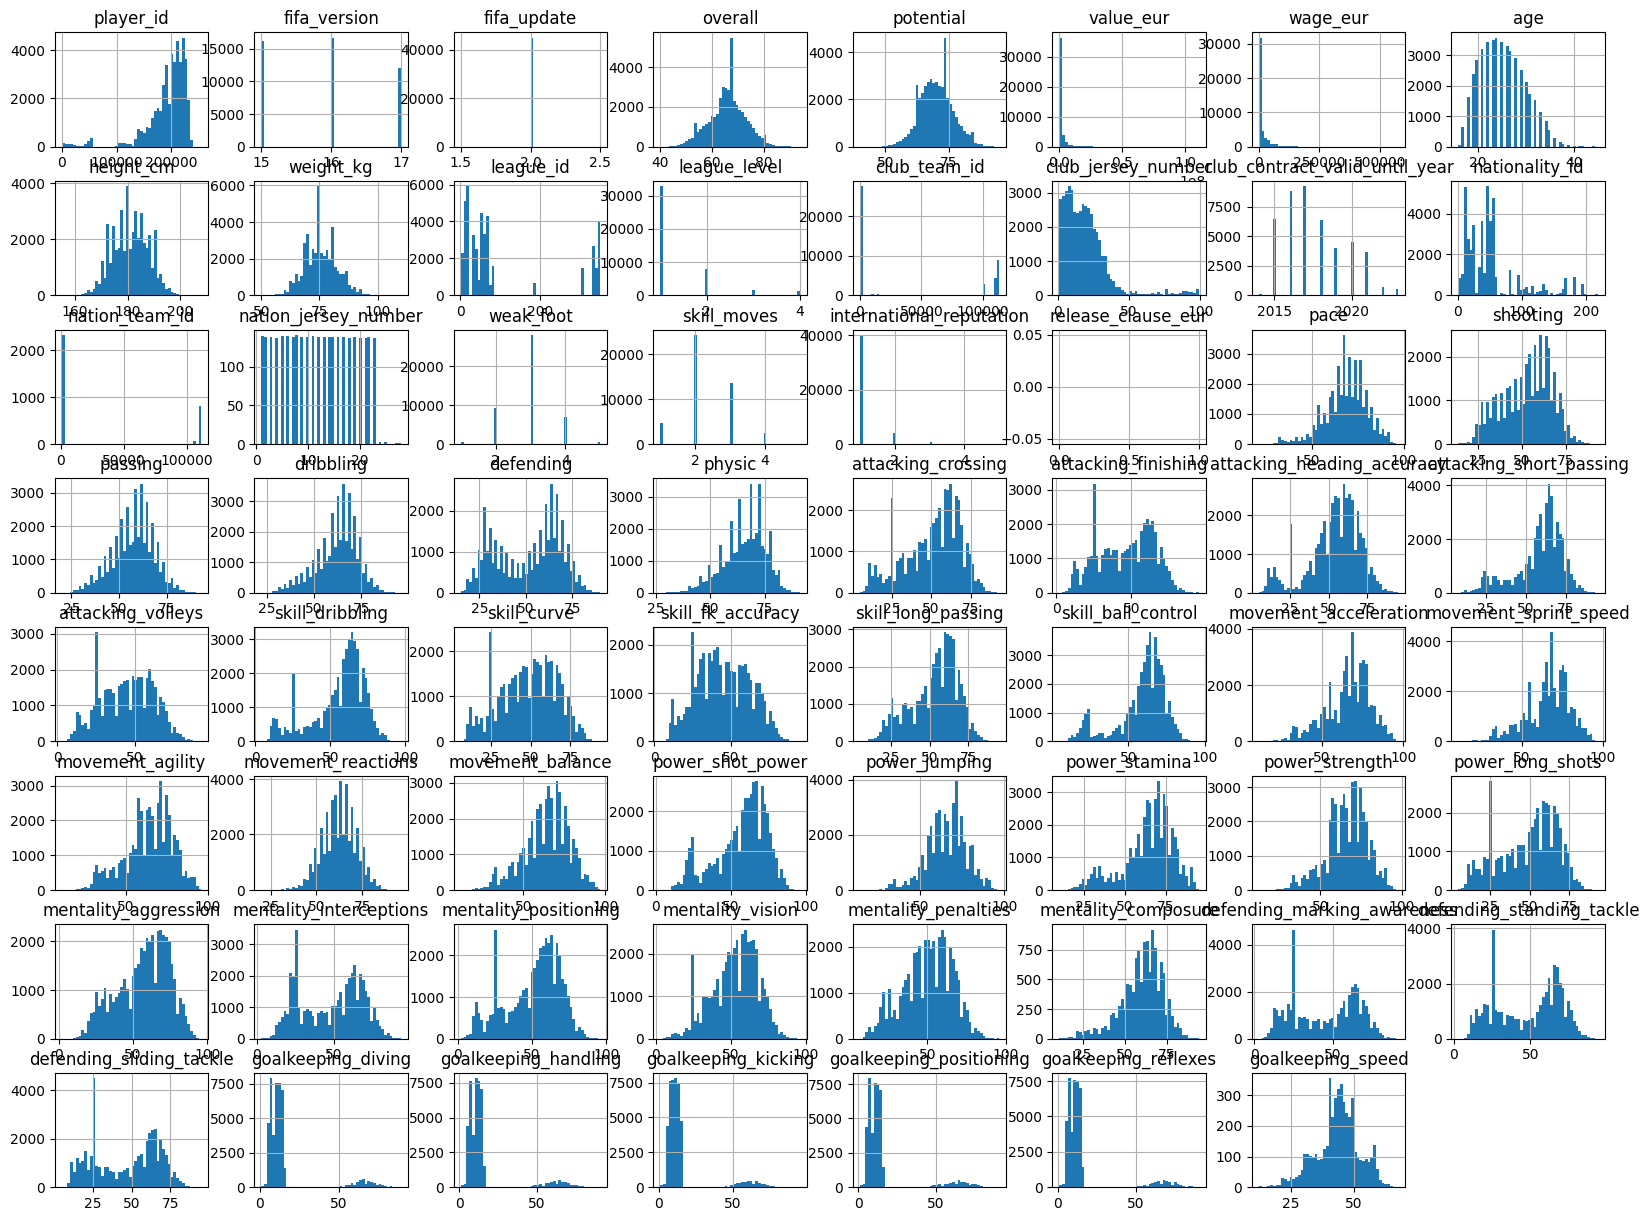

In [ ]:
male_players.hist(bins=50, figsize=(20,15))
plt.show()


use isnull and a file to check the null values thing

### Check for NAs

In [ ]:
dataset = male_players

no_nas = True
for col in dataset.columns:
    if dataset[col].isnull().any():
        print(f"There are nulls in: {col}")
        no_nas = False

if no_nas:
    print("Yup, all good no NAs in any column")

There are nulls in: short_name
There are nulls in: long_name
There are nulls in: player_positions
There are nulls in: overall
There are nulls in: potential
There are nulls in: value_eur
There are nulls in: wage_eur
There are nulls in: age
There are nulls in: dob
There are nulls in: height_cm
There are nulls in: weight_kg
There are nulls in: league_id
There are nulls in: league_name
There are nulls in: league_level
There are nulls in: club_team_id
There are nulls in: club_name
There are nulls in: club_position
There are nulls in: club_jersey_number
There are nulls in: club_loaned_from
There are nulls in: club_joined_date
There are nulls in: club_contract_valid_until_year
There are nulls in: nationality_id
There are nulls in: nationality_name
There are nulls in: nation_team_id
There are nulls in: nation_position
There are nulls in: nation_jersey_number
There are nulls in: preferred_foot
There are nulls in: weak_foot
There are nulls in: skill_moves
There are nulls in: international_reputa

### Check for columns with NAs greater than a giving threshold

In [ ]:
# dataset name goes here
dataset = male_players

# threshold for missing values (30%)
threshold = 0.30

# calculate the threshold count for missing values
threshold_count = int(threshold * len(dataset))

missing_columns = [col for col in dataset.columns if dataset[col].isnull().sum() > threshold_count]
print("Successfully checked for missing columns")
print(f"No. of missing columns: {len(missing_columns)}")

Successfully checked for missing columns
No. of missing columns: 9


In [ ]:
missing_columns

['club_loaned_from',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'mentality_composure',
 'goalkeeping_speed']

In [ ]:
# drop columns with more than threshold
male_players_cln = dataset.drop(columns=missing_columns)

print("Number of remaining columns:", len(male_players_cln.columns))
print("Remaining columns:")
for col in male_players_cln.columns:
    print(col)

Number of remaining columns: 101
Remaining columns:
player_id
player_url
fifa_version
fifa_update
fifa_update_date
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
league_id
league_name
league_level
club_team_id
club_name
club_position
club_jersey_number
club_joined_date
club_contract_valid_until_year
nationality_id
nationality_name
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


### Remove them through automation

In [ ]:
male_players_cln

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93.0,95.0,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92.0,92.0,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90.0,90.0,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90.0,90.0,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90.0,90.0,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44964,226164,/player/226164/brian-torrealba/170002,17,2,2016-09-20,B. Torrealba,Brian Nicolás Torrealba Silva,RB,63.0,78.0,...,59+1,59+1,61+1,62+1,62+1,62+1,62+1,62+1,15+1,https://cdn.sofifa.net/players/226/164/17_120.png
44965,226204,/player/226204/andrey-batyutin/170002,17,2,2016-09-20,A. Batyutin,Andrey Batyutin,"LW, ST, RW",63.0,74.0,...,41+1,41+1,44+1,40+1,35+1,35+1,35+1,40+1,17+1,https://cdn.sofifa.net/players/226/204/17_120.png
44966,226205,/player/226205/cazim-suljic/170002,17,2,2016-09-20,C. Suljic,Cazim Suljic,CM,63.0,74.0,...,62+1,62+1,61+1,61+1,61+1,61+1,61+1,61+1,17+1,https://cdn.sofifa.net/players/226/205/17_120.png
44967,226268,/player/226268/federico-dimarco/170002,17,2,2016-09-20,F. Dimarco,Federico Dimarco,"LB, LM",63.0,77.0,...,59+1,59+1,62+1,62+1,61+1,61+1,61+1,62+1,14+1,https://cdn.sofifa.net/players/226/268/17_120.png


In [ ]:
male_players_cln.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,44969.000000,44969.000000,44969.0,44968.000000,44968.000000,4.410100e+04,44323.000000,44968.000000,44968.000000,44968.000000,...,44968.000000,44968.000000,44968.000000,44968.000000,44968.000000,44968.000000,44968.000000,44968.000000,44968.000000,44968.000000
mean,193192.603972,15.909404,2.0,65.978807,70.192759,1.756724e+06,14955.136160,25.234367,181.130115,75.538961,...,52.735723,50.289940,45.397527,48.342288,46.373310,16.329879,16.013098,15.860345,16.052437,16.466576
std,37639.382660,0.787976,0.0,7.039242,6.438166,4.151549e+06,25105.039268,4.571079,6.655363,6.900440,...,15.036732,15.400835,20.619441,21.032479,20.721864,17.655119,16.607556,16.151846,16.833804,18.029806
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,155.000000,50.000000,...,3.000000,7.000000,3.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,182131.000000,15.000000,2.0,62.000000,66.000000,2.500000e+05,3000.000000,22.000000,176.000000,70.000000,...,43.000000,40.000000,25.000000,26.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,202722.000000,16.000000,2.0,66.000000,70.000000,6.250000e+05,6000.000000,25.000000,181.000000,75.000000,...,55.000000,52.000000,49.000000,54.000000,51.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,216296.000000,17.000000,2.0,71.000000,74.000000,1.500000e+06,15000.000000,28.000000,186.000000,80.000000,...,64.000000,62.000000,64.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,254664.000000,17.000000,2.0,94.000000,95.000000,1.110000e+08,575000.000000,45.000000,208.000000,110.000000,...,96.000000,96.000000,92.000000,94.000000,95.000000,89.000000,91.000000,95.000000,91.000000,90.000000


remove non-numerical data

encode non-numeric tables

### CORRELATION MATRIX

Selecting the best correlated features

In [ ]:
correlation_matrix = male_players_cln.select_dtypes(include=[np.number]).corr()

map the correlation based on the overall column to check how the overall rating of players correlates with the other features

In [ ]:
corr_overall = correlation_matrix['overall'].sort_values(ascending=False)

In [ ]:
corr_overall

overall                           1.000000
movement_reactions                0.808259
potential                         0.796256
wage_eur                          0.674400
passing                           0.642200
value_eur                         0.593285
dribbling                         0.558940
international_reputation          0.508232
physic                            0.473253
attacking_short_passing           0.466224
shooting                          0.458604
skill_long_passing                0.451945
mentality_vision                  0.447513
skill_ball_control                0.433632
age                               0.416442
power_shot_power                  0.410290
skill_curve                       0.385546
power_long_shots                  0.379667
mentality_aggression              0.372202
attacking_crossing                0.369933
skill_fk_accuracy                 0.363327
attacking_volleys                 0.348264
skill_dribbling                   0.340750
fifa_versio

In [ ]:
dict = corr_overall.to_dict()

In [ ]:
# # if the absolute correlation value > 0.5 add to list
# selected_cols = [col for col, corr in dict.items() if abs(corr) > 0.3]

In [ ]:
selected_cols = [
                  'passing', 'dribbling', 'attacking_short_passing', 'shooting',
                  'skill_long_passing', 'skill_ball_control', 'attacking_crossing',
                  'skill_fk_accuracy', 'mentality_vision', 'mentality_aggression',
                  'mentality_positioning', 'mentality_penalties', 'movement_reactions',
                  'potential', 'wage_eur', 'value_eur', 'international_reputation',
                  'age'
]

In [ ]:
df = pd.read_csv("/content/male_players (legacy).csv", usecols=selected_cols)

In [ ]:
df

,potential,value_eur,wage_eur,age,international_reputation,shooting,passing,dribbling,attacking_crossing,attacking_short_passing,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_reactions,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties
0,95.0,100500000.0,550000.0,27.0,5.0,89.0,86.0,96.0,84.0,89.0,90.0,76.0,96.0,94.0,48.0,92.0,90.0,76.0
1,92.0,79000000.0,375000.0,29.0,5.0,93.0,81.0,91.0,83.0,82.0,79.0,72.0,92.0,90.0,63.0,91.0,81.0,85.0
2,90.0,54500000.0,275000.0,30.0,5.0,86.0,83.0,92.0,80.0,86.0,83.0,76.0,90.0,89.0,47.0,89.0,84.0,80.0
3,90.0,52500000.0,275000.0,32.0,5.0,91.0,81.0,86.0,76.0,84.0,80.0,76.0,90.0,85.0,84.0,86.0,83.0,91.0
4,90.0,63500000.0,300000.0,28.0,5.0,NaN,NaN,NaN,25.0,42.0,25.0,41.0,31.0,89.0,29.0,25.0,20.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44964,78.0,575000.0,1000.0,18.0,1.0,26.0,49.0,55.0,54.0,55.0,20.0,51.0,55.0,54.0,64.0,45.0,41.0,39.0
44965,74.0,575000.0,5000.0,21.0,1.0,65.0,52.0,68.0,37.0,62.0,51.0,48.0,71.0,55.0,30.0,68.0,52.0,67.0
44966,74.0,525000.0,4000.0,19.0,1.0,60.0,62.0,67.0,59.0,67.0,51.0,61.0,67.0,60.0,65.0,43.0,60.0,50.0
44967,77.0,575000.0,2000.0,18.0,1.0,33.0,54.0,60.0,63.0,56.0,58.0,50.0,59.0,59.0,62.0,54.0,45.0,54.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44969 entries, 0 to 44968
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   potential                 44968 non-null  float64
 1   value_eur                 44101 non-null  float64
 2   wage_eur                  44323 non-null  float64
 3   age                       44968 non-null  float64
 4   international_reputation  44968 non-null  float64
 5   shooting                  40228 non-null  float64
 6   passing                   40228 non-null  float64
 7   dribbling                 40228 non-null  float64
 8   attacking_crossing        44968 non-null  float64
 9   attacking_short_passing   44968 non-null  float64
 10  skill_fk_accuracy         44968 non-null  float64
 11  skill_long_passing        44968 non-null  float64
 12  skill_ball_control        44968 non-null  float64
 13  movement_reactions        44968 non-null  float64
 14  mental

fill NAs

In [ ]:
# df.fillna(df.median(), inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.shape

(44969, 18)

In [ ]:
df

,potential,value_eur,wage_eur,age,international_reputation,shooting,passing,dribbling,attacking_crossing,attacking_short_passing,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_reactions,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties
0,95.0,100500000.0,550000.0,27.0,5.0,89.0,86.0,96.0,84.0,89.0,90.0,76.0,96.0,94.0,48.0,92.0,90.0,76.0
1,92.0,79000000.0,375000.0,29.0,5.0,93.0,81.0,91.0,83.0,82.0,79.0,72.0,92.0,90.0,63.0,91.0,81.0,85.0
2,90.0,54500000.0,275000.0,30.0,5.0,86.0,83.0,92.0,80.0,86.0,83.0,76.0,90.0,89.0,47.0,89.0,84.0,80.0
3,90.0,52500000.0,275000.0,32.0,5.0,91.0,81.0,86.0,76.0,84.0,80.0,76.0,90.0,85.0,84.0,86.0,83.0,91.0
4,90.0,63500000.0,300000.0,28.0,5.0,55.0,58.0,64.0,25.0,42.0,25.0,41.0,31.0,89.0,29.0,25.0,20.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44964,78.0,575000.0,1000.0,18.0,1.0,26.0,49.0,55.0,54.0,55.0,20.0,51.0,55.0,54.0,64.0,45.0,41.0,39.0
44965,74.0,575000.0,5000.0,21.0,1.0,65.0,52.0,68.0,37.0,62.0,51.0,48.0,71.0,55.0,30.0,68.0,52.0,67.0
44966,74.0,525000.0,4000.0,19.0,1.0,60.0,62.0,67.0,59.0,67.0,51.0,61.0,67.0,60.0,65.0,43.0,60.0,50.0
44967,77.0,575000.0,2000.0,18.0,1.0,33.0,54.0,60.0,63.0,56.0,58.0,50.0,59.0,59.0,62.0,54.0,45.0,54.0


In [ ]:
no_nas = True
for col in df.columns:
    if df[col].isnull().any():
        print(f"There are nulls in: {col}")
        no_nas = False

if no_nas:
    print("Yup, all good no NAs in any column")


Yup, all good no NAs in any column


# FEATURE ENGINEERING

In [ ]:
columns = [
    # Physical Attributes
    "height_cm", "weight_kg",

    # Skill Attributes
    "pace", "shooting", "passing", "dribbling", "defending", "physic",

    # Attacking Skills
    "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy",
    "attacking_short_passing", "attacking_volleys",

    # Skill Moves
    "skill_dribbling", "skill_curve", "skill_fk_accuracy",
    "skill_long_passing", "skill_ball_control",

    # Movement
    "movement_acceleration", "movement_sprint_speed",
    "movement_agility", "movement_reactions", "movement_balance",

    # Power
    "power_shot_power", "power_jumping", "power_stamina",
    "power_strength", "power_long_shots",

    # Mentality
    "mentality_aggression", "mentality_interceptions", "mentality_positioning",
    "mentality_vision", "mentality_penalties", "mentality_composure",

    # Defending
    "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle",

    # Goalkeeping
    "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking",
    "goalkeeping_positioning", "goalkeeping_reflexes",

    # Personal Info
    "age", "preferred_foot", "weak_foot", "skill_moves",
    "international_reputation", "work_rate", "body_type"
]


### Columns to be used for training (Potential):
Physical Attributes: height_cm, weight_kg

Skill Attributes: pace, shooting, passing, dribbling, defending, physic

Attacking Skills: attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys

Skill Moves: skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control

Movement: movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance

Power: power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots

Mentality: mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure

Defending: defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle

Goalkeeping: goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes

Personal Info: age, preferred_foot, weak_foot, skill_moves, international_reputation, work_rate, body_type
